# About the dataset

Bank client data:

1 - 'Age': (numeric)

2 - 'Job': type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid', 'management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - 'Marital Status': marital status (categorical: 'divorced','married','single','unknown', 'divorced' means divorced or widowed)

4 - 'Education',: (categorical: primary, secondary, tertiary and unknown)

5 - 'Credit Default': has credit in default? (categorical: 'no','yes','unknown')

6 - 'Average Yearly Balance': Balance of the individual.

7 - 'Housing Loan': has housing loan? (categorical: 'no','yes','unknown')

8 - 'Personal Loan': has personal loan? (categorical: 'no','yes','unknown')




# Related with the last contact of the current campaign:
    
9 - 'Communication Type': contact communication type (categorical: 'cellular','telephone')
    
10 - 'Last Contact Day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - 'Last Contact Month': last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
12 - 'Last Call Duration': last contact duration, in seconds (numeric).

# Other attributes:
13 - 'No of Campaign': number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - 'No of days passed after last contact': number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - 'Previous Contact Before Campaign': number of contacts performed before this campaign and for this client (numeric)

16 - 'Outcome of Previous Campaign': outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


# Output variable (desired target):
    
'Target' - has the client subscribed a term deposit? (binary: 'yes','no')

# PROBLEM STATEMENT

# OBSERVATION: 7 numerical 9 categorical 1 Target

# Importing all the necessary libraries

In [1]:
import pandas                   as      pd
import numpy                    as      np
import sklearn.datasets         as      datasets
import matplotlib.pyplot        as      plt
import seaborn as sns

from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.tree             import _tree

from   sklearn                  import  metrics 
from   sklearn.metrics          import  classification_report
from   sklearn.metrics          import  confusion_matrix
from   sklearn.metrics          import  roc_curve, auc
from   sklearn.model_selection  import  KFold 

from   sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

from   sklearn.model_selection import  cross_val_score
from   sklearn.model_selection import  KFold

# Load data file

In [2]:
bank=pd.read_csv('Bank Marketing dataset.csv')
bank.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


# Renaming columns

In [3]:
bank.rename(columns={'V1':"Age",'V2':"Job",'V3':"Marital Status",'V4':"Education",'V5':"Credit Default",
                      'V6':"Average Yearly Balance",'V7':"Housing Loan",'V8':"Personal Loan",
                    'V9':"Communication Type",'V10':"Last Contact Day",'V11':"Last Contact Month",
                     'V12':"Last Call Duration",'V13':"No of Campaign",
                        'V14':"No of days passed after last contact",
                        'V15':"Previous Contact Before Campaign",'V16':"Outcome of Previous Campaign",'Class':"Target"},inplace=True)

In [4]:
bank.head()

,Age,Job,Marital Status,Education,Credit Default,Average Yearly Balance,Housing Loan,Personal Loan,Communication Type,Last Contact Day,Last Contact Month,Last Call Duration,No of Campaign,No of days passed after last contact,Previous Contact Before Campaign,Outcome of Previous Campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [5]:
bank.tail()

,Age,Job,Marital Status,Education,Credit Default,Average Yearly Balance,Housing Loan,Personal Loan,Communication Type,Last Contact Day,Last Contact Month,Last Call Duration,No of Campaign,No of days passed after last contact,Previous Contact Before Campaign,Outcome of Previous Campaign,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,1


In [6]:
bank.size

768587

In [7]:
bank.shape

(45211, 17)

In [8]:
bank.describe()

,Age,Average Yearly Balance,Last Contact Day,Last Call Duration,No of Campaign,No of days passed after last contact,Previous Contact Before Campaign,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


In [9]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
Average Yearly Balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
Last Contact Day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
Last Call Duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
No of Campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
No of days passed after last contact,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
Previous Contact Before Campaign,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
Target,45211.0,1.116985,0.321406,1.0,1.0,1.0,1.0,2.0


# checking data has null values or not

In [10]:
bank[bank.isnull().any(axis=1)].count()

Age                                     0
Job                                     0
Marital Status                          0
Education                               0
Credit Default                          0
Average Yearly Balance                  0
Housing Loan                            0
Personal Loan                           0
Communication Type                      0
Last Contact Day                        0
Last Contact Month                      0
Last Call Duration                      0
No of Campaign                          0
No of days passed after last contact    0
Previous Contact Before Campaign        0
Outcome of Previous Campaign            0
Target                                  0
dtype: int64

In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
Age                                     45211 non-null int64
Job                                     45211 non-null object
Marital Status                          45211 non-null object
Education                               45211 non-null object
Credit Default                          45211 non-null object
Average Yearly Balance                  45211 non-null int64
Housing Loan                            45211 non-null object
Personal Loan                           45211 non-null object
Communication Type                      45211 non-null object
Last Contact Day                        45211 non-null int64
Last Contact Month                      45211 non-null object
Last Call Duration                      45211 non-null int64
No of Campaign                          45211 non-null int64
No of days passed after last contact    45211 non-null int64
Previous Contact Before Campa

# INFERENCES::no null values are found

In [12]:
bank.dtypes

Age                                      int64
Job                                     object
Marital Status                          object
Education                               object
Credit Default                          object
Average Yearly Balance                   int64
Housing Loan                            object
Personal Loan                           object
Communication Type                      object
Last Contact Day                         int64
Last Contact Month                      object
Last Call Duration                       int64
No of Campaign                           int64
No of days passed after last contact     int64
Previous Contact Before Campaign         int64
Outcome of Previous Campaign            object
Target                                   int64
dtype: object

# INFERENCES:we should convert every object column  into int64 type

In [13]:
bank.loc[bank["Target"]==1,"Target"]=0
bank.loc[bank["Target"]==2,"Target"]=1
bank.head()

,Age,Job,Marital Status,Education,Credit Default,Average Yearly Balance,Housing Loan,Personal Loan,Communication Type,Last Contact Day,Last Contact Month,Last Call Duration,No of Campaign,No of days passed after last contact,Previous Contact Before Campaign,Outcome of Previous Campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# Exploratory Data Analysis:
EDA can be approached in 3 ways

1. Univariate analysis

  a. to understand the central tendency and spread of numerical variables

  b. to understand the proportion of the various levels of categorical variables

2. Bivariate & Multivariate analysis

  a. Understand the relationship between 2 variables

  b. Visualise the impact of various X variables on Y variable, thereby giving cues for
     feature selection

# UNIVARIATE ANALYSIS ( NUMERICAL COLUMNS)

# Age

In [14]:
bank["Age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64

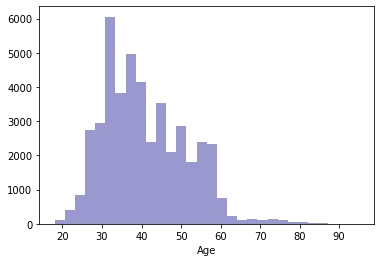

In [15]:
sns.distplot(bank['Age'],kde=False,color='darkblue',bins=30)
plt.show()

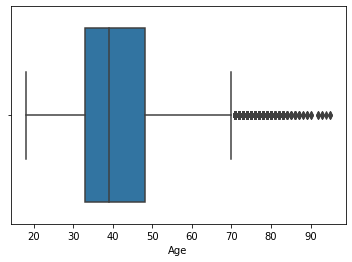

In [16]:
# Boxplot for 'age'
sns.boxplot(bank["Age"])
plt.show()

# Observations:

-> We can identify in the Age column that the mean is greater than the median i.e.it is affected by high outliers.(Right
Skewed).

-> The median age of customers is around 39 years.

# "Average Yearly Balance"

In [17]:
bank["Average Yearly Balance"].describe()
#Here mean is greater then the median

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: Average Yearly Balance, dtype: float64

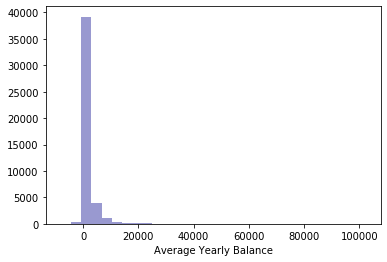

In [18]:
sns.distplot(bank['Average Yearly Balance'],kde=False,color='darkblue',bins=30)
plt.show()

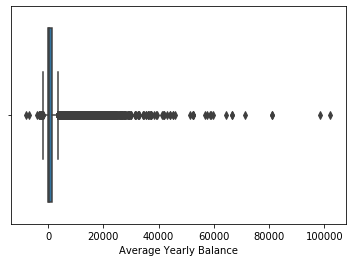

In [19]:
# Boxplot for "Average Yearly Balance"
sns.boxplot(bank["Average Yearly Balance"])
plt.show()

# Observations:

-> The Average Yearly Balance is affected by high outliers. ( Mean>Median).
It is right skewed.

# Last Contact Day

In [20]:
bank["Last Contact Day"].describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: Last Contact Day, dtype: float64

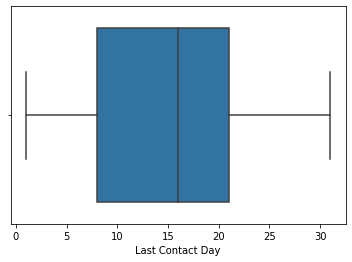

In [21]:
# Boxplot for "Last Day Contact"
sns.boxplot(bank["Last Contact Day"])
plt.show()



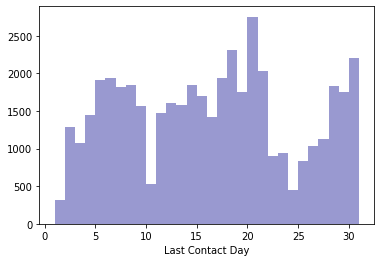

In [22]:
sns.distplot(bank['Last Contact Day'],kde=False,color='darkblue',bins=30)
plt.show()

# Observations:

-> Here we can observe that Median > Mean we have low outlier the column is left skewed.

-> The median value of last contact day is around 16.

-> The maximum value is about 31 which means the latest a customer was contacted was a month earlier.

# Last Call Duration

In [23]:
bank["Last Call Duration"].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: Last Call Duration, dtype: float64

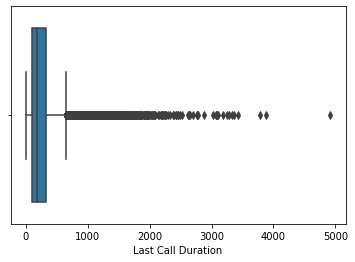

In [24]:
# Boxplot for 'age'
sns.boxplot(bank["Last Call Duration"])
plt.show()

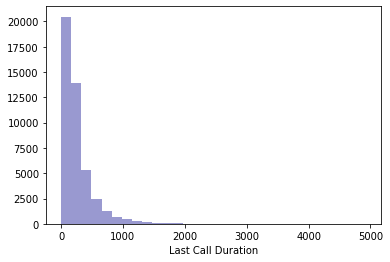

In [25]:
sns.distplot(bank['Last Call Duration'],kde=False,color='darkblue',bins=30)
plt.show()

# Observations:

-> Duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. 


-> Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we dont loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.

# No of Campaign


In [26]:
bank["No of Campaign"].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: No of Campaign, dtype: float64

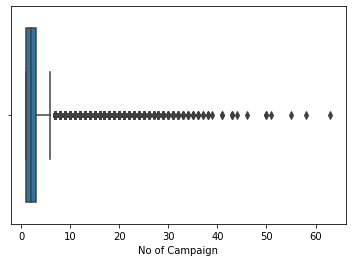

In [27]:
sns.boxplot(bank["No of Campaign"])
plt.show()

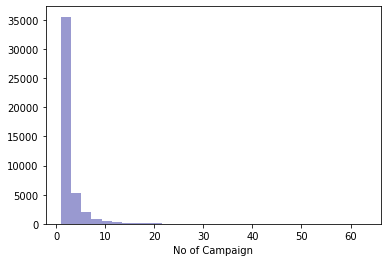

In [28]:
sns.distplot(bank['No of Campaign'],kde=False,color='darkblue',bins=30)
plt.show()

# Observations:¶

-> Here, we can observe that no much effort is shown by the Portuguese bank in holding more campaigns for the clients. The value of Mean >Median i.e. there are high outliers and it is right skewed. The Portuguese bank should hold more campaigns in order to get more clients who can subscribe for the term deposit in future.

# No of days passed after last contact

In [29]:
bank["No of days passed after last contact"]=np.where(bank["No of days passed after last contact"]==-1,0,bank["No of days passed after last contact"])

In [30]:
bank["No of days passed after last contact"].describe()

count    45211.000000
mean        41.015195
std         99.792615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        871.000000
Name: No of days passed after last contact, dtype: float64

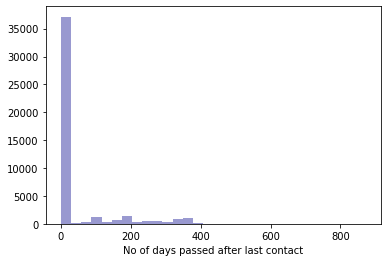

In [31]:
sns.distplot(bank['No of days passed after last contact'],kde=False,color='darkblue',bins=30)
plt.show()

# Observations

-> Here we can see that Mean >Median ie  high outliers are present and it's right skewed We can easily infer that after the last day of contact  with the client so many days have passed but no other contact was made. They can make their marketing strategies in such a way so that they can reach out to more and more people. Because they are not reachable to more customers with just call. And they should be able to get in touch within a specific time period.

# Previous Contact Before Campaign

In [32]:
bank["Previous Contact Before Campaign"].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: Previous Contact Before Campaign, dtype: float64

In [33]:
bank["Previous Contact Before Campaign"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: Previous Contact Before Campaign, dtype: int64

# Observation:

-> Here we can see that Mean >Median i.e. high outliers are present and it's right skewed We can easily infer that after the last day of contact with the client so many days have passed but no other contact was made. They can make their marketing strategies in such a way so that they can reach out to more and more people.Because they are not reachable to more customers with just call. And they should be able to get in touch within a specific time period.

# JOB

In [34]:
categorcial_variables = ['Job']

In [35]:
bank["Job"].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: Job, dtype: float64

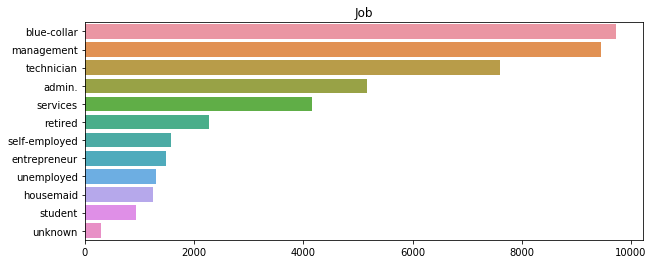

In [36]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)

# OBSERVATION:

-> We can identify that the value counts of Blue-collar jobs are more.

In [37]:
bank_Job=pd.crosstab(bank.Job,bank.Target)
print(bank_Job)


Target            0     1
Job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


In [38]:
bank["Job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: Job, dtype: int64

In [39]:

admin_percentage = ((631)/(5171))*100
blue_collar_percentage = ((708)/(9732))*100
entrepreneur_percentage = ((123)/(1487))*100
housemaid_percentage = ((109)/(1240))*100
management_percentage = ((1301)/(9458))*100
retired_percentage = ((516)/(2264))*100
self_employed_percentage = ((187)/(1579))*100
services_percentage = ((369)/(4154))*100
student_percentage = ((269)/(938))*100
technician_percentage = ((840)/(7597))*100
unemployed_percentage = ((202)/(1303))*100
unknown_percentage = ((34)/(288))*100
print('perentage of  admin. people agreeing  for term deposit: ',admin_percentage)
print('perentage of  blue-collar people agreeing  for term deposit: ',blue_collar_percentage)
print('perentage of entrepreneur people agreeing  for term deposit: ',entrepreneur_percentage)
print('perentage of  housemaid people agreeing  for term deposit: ',housemaid_percentage)
print('perentage of  management people agreeing  for term deposit: ',management_percentage)
print('perentage of retired people agreeing  for term deposit: ',retired_percentage)
print('perentage of self-employed  people agreeing  for term deposit: ',self_employed_percentage)
print('perentage of services people agreeing  for term deposit: ',services_percentage)
print('perentage of student people agreeing  for term deposit: ',student_percentage)
print('perentage of technician people agreeing  for term deposit: ',technician_percentage)
print('perentage of unemployed people agreeing  for term deposit: ',unemployed_percentage)
print('perentage of unknown people agreeing  for term deposit: ',unknown_percentage)


perentage of  admin. people agreeing  for term deposit:  12.202668729452718
perentage of  blue-collar people agreeing  for term deposit:  7.274969173859433
perentage of entrepreneur people agreeing  for term deposit:  8.271687962340282
perentage of  housemaid people agreeing  for term deposit:  8.790322580645162
perentage of  management people agreeing  for term deposit:  13.755550856417848
perentage of retired people agreeing  for term deposit:  22.791519434628977
perentage of self-employed  people agreeing  for term deposit:  11.842938568714375
perentage of services people agreeing  for term deposit:  8.883004333172845
perentage of student people agreeing  for term deposit:  28.678038379530918
perentage of technician people agreeing  for term deposit:  11.056996182703699
perentage of unemployed people agreeing  for term deposit:  15.502686108979278
perentage of unknown people agreeing  for term deposit:  11.805555555555555


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

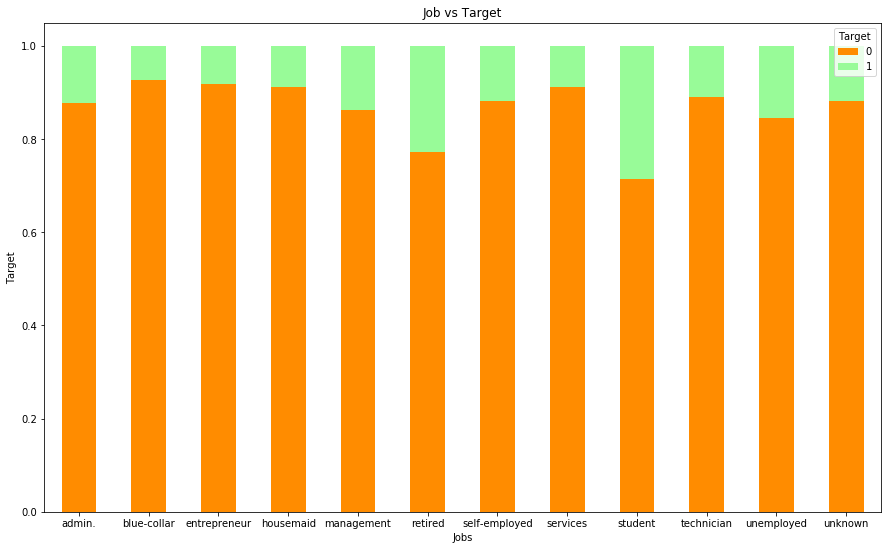

In [40]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=15,9
bank_Job.div(bank_Job.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Job vs Target')
plt.xlabel('Jobs')
plt.ylabel('Target')
plt.xticks(rotation=0)

# Observations:


-> The highest job category of the customers is blue-collared job.

-> Not surprisingly, clients that were students or retired were the most likely to subscribe to a
term deposit.

-> Retired individuals tend to have more term deposits in order to gain some cash through interest payments they might agree not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution.

-> The count of the ‘zeros’ are 88% and ‘ones’ are 12%. This indicates that the dataset has a class imbalance for the Y variable.

-> After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are more likely to put their cash to work by lending it to the financial institution.
 

-> Students were the other group that used to subscribe term deposits for their future use like higher studies or financial settlement or for marriage purpose

# Martial Status

In [41]:
categorcial_variables = ['Marital Status']

In [42]:
bank["Marital Status"].value_counts(normalize=True)


married     0.601933
single      0.282896
divorced    0.115171
Name: Marital Status, dtype: float64

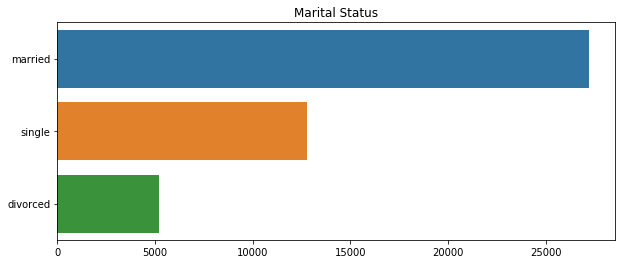

In [43]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)

# observation:

->About 50% of the customers are married.

In [44]:
bank["Marital Status"].value_counts()

married     27214
single      12790
divorced     5207
Name: Marital Status, dtype: int64

In [45]:
bank_MS=pd.crosstab(bank["Marital Status"],bank["Target"])
print(bank_MS)

Target              0     1
Marital Status             
divorced         4585   622
married         24459  2755
single          10878  1912


In [46]:
married_percentage = ((2755)/(27214))*100
divorced_percentage = ((622)/(5207))*100
single_percentage = ((1912)/(12790))*100
print('perentage of divorced people agreeing  for term deposit: ',divorced_percentage)
print('perentage of married people agreeing  for term deposit: ',married_percentage)
print('perentage of single people agreeing  for term deposit: ',single_percentage)

perentage of divorced people agreeing  for term deposit:  11.945458037257538
perentage of married people agreeing  for term deposit:  10.123465863158668
perentage of single people agreeing  for term deposit:  14.94917904612979


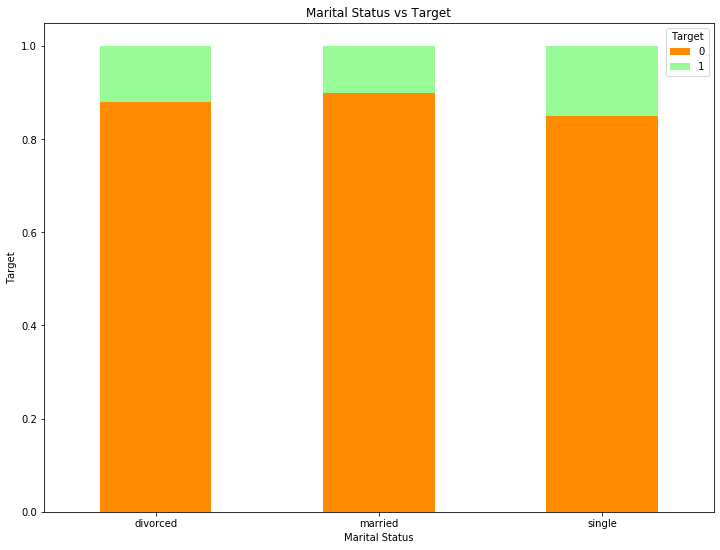

In [47]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
bank_MS.div(bank_MS.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Marital Status vs Target')
plt.xlabel("Marital Status")
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.show()

# Observations:

-> Looks like the people who are single are more willing to subscribe for the term deposit followed by people who are married and divorced.

-> Well in this analysis we can find some significant insights other than most divorced individuals are broke.

-> No wonder since they have to split financial assets.

-> For married people financial spread is more might be that they cannot subscribe the loan

# Education

In [48]:
categorcial_variables = ['Education']

In [49]:
bank["Education"].value_counts(normalize=True)


secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: Education, dtype: float64

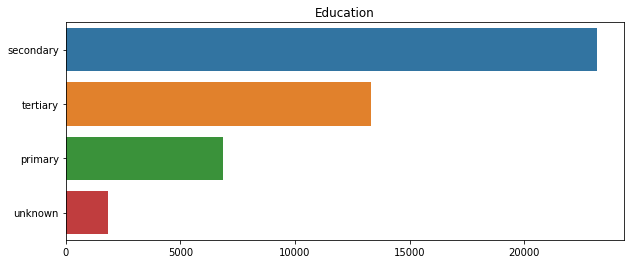

In [50]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)

# observation:

-> Customers with secondary level of the education constitute the majority of contacted customers

In [51]:
bank['Education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: Education, dtype: int64

In [52]:
bank["Education"].unique()



array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [53]:
bank_education=pd.crosstab(bank["Education"],bank["Target"])
print(bank_education)


Target         0     1
Education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252


In [54]:
primary_percentage = ((591)/(6851))*100
secondary_percentage = ((2450)/(23202))*100
tertiary_percentage = ((1996)/(13301))*100
unknown_percentage = ((252)/(1857))*100
print('perentage of primary people agreeing  for term deposit: ',primary_percentage)
print('perentage of secondarypeople agreeing  for term deposit: ',secondary_percentage)
print('perentage of tertiary people agreeing  for term deposit: ',tertiary_percentage)
print('perentage of unknown people agreeing  for term deposit: ',unknown_percentage)


perentage of primary people agreeing  for term deposit:  8.626477886439936
perentage of secondarypeople agreeing  for term deposit:  10.559434531505904
perentage of tertiary people agreeing  for term deposit:  15.006390496955117
perentage of unknown people agreeing  for term deposit:  13.5702746365105


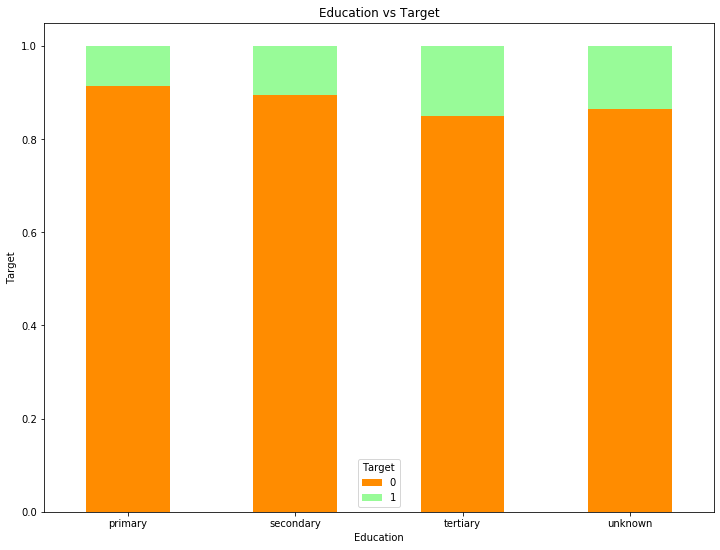

In [55]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
bank_education.div(bank_education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Education vs Target')
plt.xlabel("Education")
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.show()

# Observations:

-> Looks like the people who are tertiary Educated are more willing to subscribe for the term deposit followed by people who are primary, secondary and unknown

# Credit Default


In [56]:
categorcial_variables = ['Credit Default']

In [57]:
bank['Credit Default'].value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: Credit Default, dtype: float64

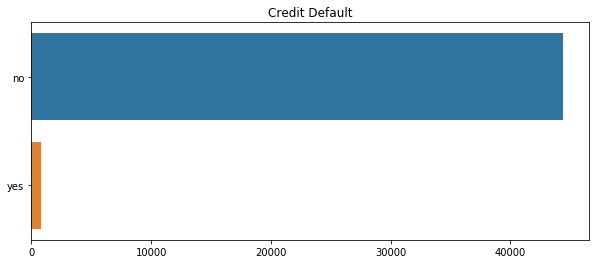

In [58]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)

# observation:

-> Most customers have not defaulted credit till date.

In [59]:
bank["Credit Default"].value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: Credit Default, dtype: float64

In [60]:
bank["Credit Default"].unique()


array(['no', 'yes'], dtype=object)

In [61]:
bank_Credit_Default=pd.crosstab(bank["Credit Default"],bank["Target"])
print(bank_Credit_Default)


Target              0     1
Credit Default             
no              39159  5237
yes               763    52


In [62]:
no_percentage = ((5237)/(44396))*100
yes_percentage = ((52)/(815))*100
print('perentage of no people agreeing  for term deposit: ',no_percentage)
print('perentage of  yes people agreeing  for term deposit: ',yes_percentage)


perentage of no people agreeing  for term deposit:  11.796107757455626
perentage of  yes people agreeing  for term deposit:  6.38036809815951


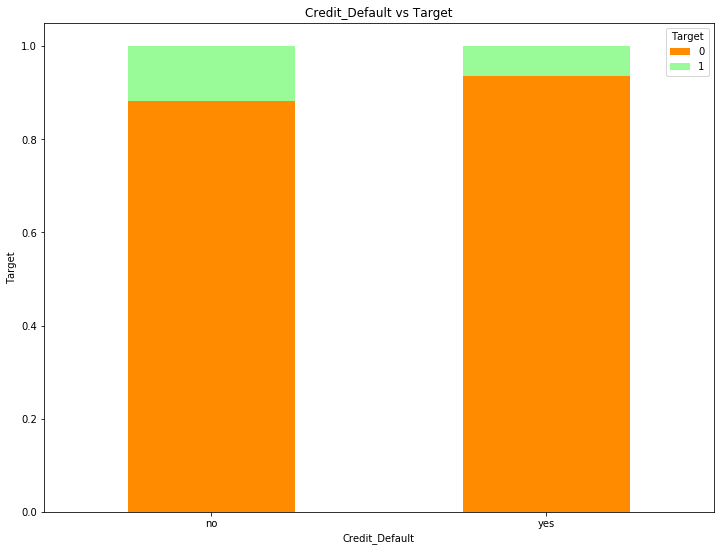

In [63]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
bank_Credit_Default.div(bank_Credit_Default.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Credit_Default vs Target')
plt.xlabel("Credit_Default")
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.show()

# Observations:

-> The people who are not having any credit default are not subscribing.

-> Generally more people with credit default are subscribing.

# Housing Loan

In [64]:
categorcial_variables = ['Housing Loan']

In [65]:
bank['Housing Loan'].value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: Housing Loan, dtype: float64

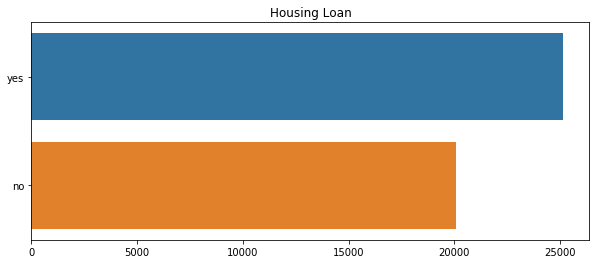

In [66]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)

# observations:

->Here customers with housing loans received the most number of calls.

In [67]:
bank_Housing_Loan=pd.crosstab(bank["Housing Loan"],bank["Target"])
print(bank_Housing_Loan)


Target            0     1
Housing Loan             
no            16727  3354
yes           23195  1935


In [68]:
no_percentage = ((3354)/(25130))*100
yes_percentage = ((1935)/(20081))*100
print('perentage of no people agreeing  for term deposit: ',no_percentage)
print('perentage of  yes people agreeing  for term deposit: ',yes_percentage)


perentage of no people agreeing  for term deposit:  13.346597692001591
perentage of  yes people agreeing  for term deposit:  9.635974304068522


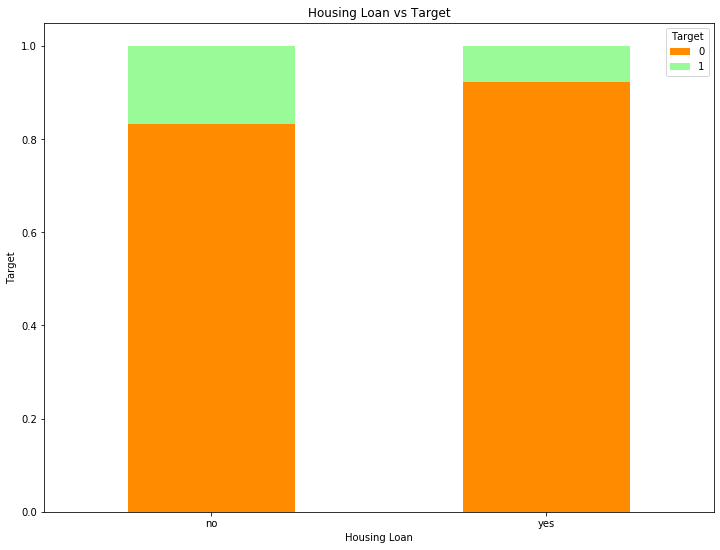

In [69]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
bank_Housing_Loan.div(bank_Housing_Loan.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Housing Loan vs Target')
plt.xlabel("Housing Loan")
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.show()

# Observations:

-> Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category.

-> This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for hior her to subscribe to a term deposit account.

-> However, we see that potential clients in the average and high balances are less likely to have a house loan and therefore, more likely to open a term deposit.

-> Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of subscribing to a term deposit.

# Personal Loan

In [70]:
categorcial_variables = ['Personal Loan']

In [71]:
bank['Personal Loan'].value_counts(normalize=True)

no     0.839774
yes    0.160226
Name: Personal Loan, dtype: float64

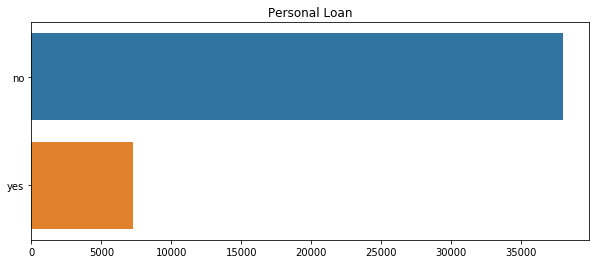

In [72]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)

# observation:

-> Customers with personal loan havereceived more calls than those who do not have.

In [73]:
bank["Personal Loan"].value_counts()

no     37967
yes     7244
Name: Personal Loan, dtype: int64

In [74]:
no_percentage = ((4805)/(37967))*100
yes_percentage = ((484)/(7244))*100
print('perentage of no people agreeing  for term deposit: ',no_percentage)
print('perentage of  yes people agreeing  for term deposit: ',yes_percentage)


perentage of no people agreeing  for term deposit:  12.655727342165566
perentage of  yes people agreeing  for term deposit:  6.681391496410822


In [75]:
bank_Personal_Loan=pd.crosstab(bank["Personal Loan"],bank["Target"])
print(bank_Personal_Loan)

Target             0     1
Personal Loan             
no             33162  4805
yes             6760   484


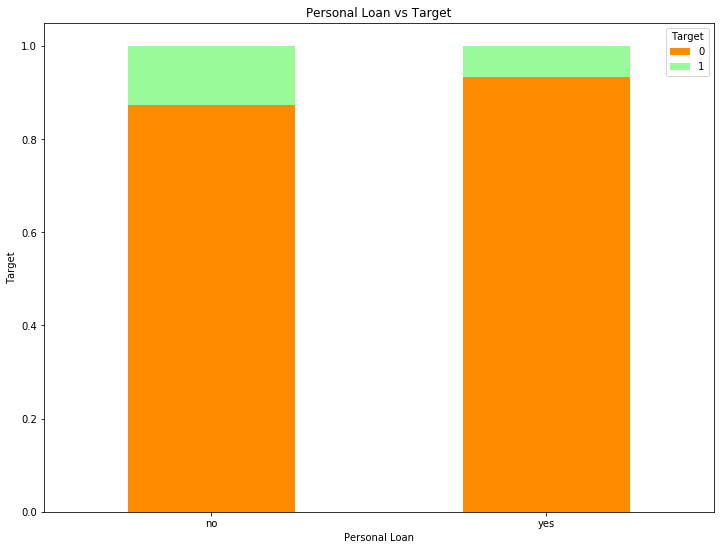

In [76]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
bank_Personal_Loan.div(bank_Personal_Loan.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Personal Loan vs Target')
plt.xlabel("Personal Loan")
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.show()

# Observations

-> The people who are not taking personal loans are subscribing for term deposit and the people who have taken personal loans are not subscribing.

# Last Contact Month

In [77]:
categorcial_variables = [ 'Last Contact Month']

In [78]:
bank['Last Contact Month'].value_counts(normalize=True)

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: Last Contact Month, dtype: float64

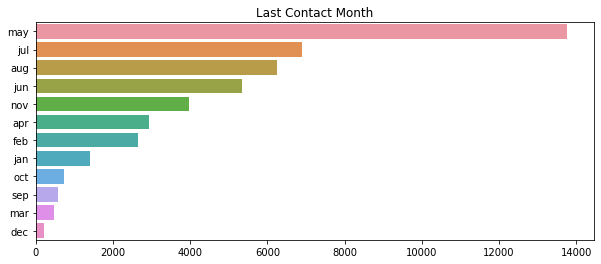

In [79]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)

# observation:

->May month recorded the most of the calls when customers were contacted for the last time.

In [80]:
bank["Last Contact Month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: Last Contact Month, dtype: int64

In [81]:
bank_Last_Contact_Month=pd.crosstab(bank["Last Contact Month"],bank["Target"])
print(bank_Last_Contact_Month)

Target                  0    1
Last Contact Month            
apr                  2355  577
aug                  5559  688
dec                   114  100
feb                  2208  441
jan                  1261  142
jul                  6268  627
jun                  4795  546
mar                   229  248
may                 12841  925
nov                  3567  403
oct                   415  323
sep                   310  269


In [82]:
apr = ((577)/(2932))*100
aug = ((688)/(6247))*100
dec = ((100)/(214))*100
feb = ((441)/(2649))*100
jan = ((142)/(1403))*100
jul = ((627)/(6895))*100
jun = ((546)/(5341))*100
mar = ((248)/(477))*100
may = ((925)/(13766))*100
nov = ((403)/(3970))*100
oct = ((323)/(738))*100
sep = ((269)/(579))*100
print('perentage of  apr people agreeing  for term deposit: ',apr)
print('perentage of  aug people agreeing  for term deposit: ',aug)
print('perentage of dec people agreeing  for term deposit: ',dec)
print('perentage of feb people agreeing  for term deposit: ',feb)
print('perentage of  jan people agreeing  for term deposit: ',jan)
print('perentage of jul people agreeing  for term deposit: ',jul)
print('perentage of jun people agreeing  for term deposit: ',jun)
print('perentage of mar people agreeing  for term deposit: ',mar)
print('perentage of may people agreeing  for term deposit: ',may)
print('perentage of nov people agreeing  for term deposit: ',nov)
print('perentage of oct people agreeing  for term deposit: ',oct)
print('perentage of sep people agreeing  for term deposit: ',sep)


perentage of  apr people agreeing  for term deposit:  19.679399727148706
perentage of  aug people agreeing  for term deposit:  11.013286377461181
perentage of dec people agreeing  for term deposit:  46.728971962616825
perentage of feb people agreeing  for term deposit:  16.64779161947905
perentage of  jan people agreeing  for term deposit:  10.121168923734853
perentage of jul people agreeing  for term deposit:  9.09354604786077
perentage of jun people agreeing  for term deposit:  10.222804718217562
perentage of mar people agreeing  for term deposit:  51.99161425576519
perentage of may people agreeing  for term deposit:  6.719453726572715
perentage of nov people agreeing  for term deposit:  10.151133501259446
perentage of oct people agreeing  for term deposit:  43.766937669376695
perentage of sep people agreeing  for term deposit:  46.45941278065631


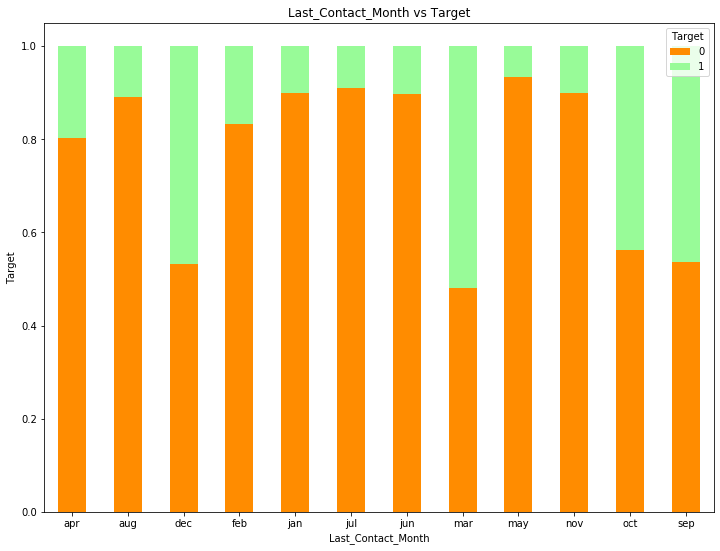

In [83]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
bank_Last_Contact_Month.div(bank_Last_Contact_Month.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Last_Contact_Month vs Target')
plt.xlabel("Last_Contact_Month")
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.show()

# Observations:

-> We saw that the the month of highest level of conversion  was the month of March.

# Communication Type

In [84]:
categorcial_variables = ['Communication Type']

In [85]:
bank['Communication Type'].value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: Communication Type, dtype: float64

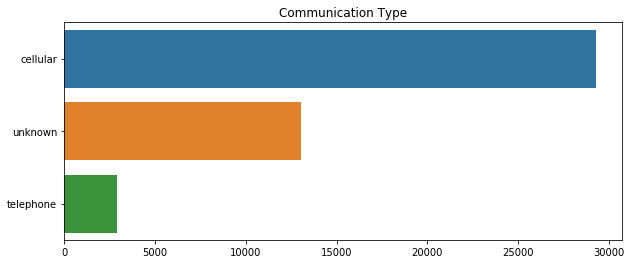

In [86]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)

# OBSERVATION:

-> We observe that the medium of communication is mostly through “cellular”.

In [87]:
bank["Communication Type"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: Communication Type, dtype: int64

In [88]:
bank["Communication Type"].unique()


array(['unknown', 'cellular', 'telephone'], dtype=object)

In [89]:
cellular_percentage = ((4369)/(29285))*100
telephone_percentage = ((390)/(13020))*100
unknown_percentage = ((530)/(2906))*100
print('perentage of cellular people agreeing  for term deposit: ',cellular_percentage)
print('perentage of telephone people agreeing  for term deposit: ',telephone_percentage)
print('perentage of unknown people agreeing  for term deposit: ',unknown_percentage)

perentage of cellular people agreeing  for term deposit:  14.918900460986853
perentage of telephone people agreeing  for term deposit:  2.995391705069124
perentage of unknown people agreeing  for term deposit:  18.2381280110117


In [90]:
bank_CT=pd.crosstab(bank["Communication Type"],bank["Target"])
print(bank_CT)

Target                  0     1
Communication Type             
cellular            24916  4369
telephone            2516   390
unknown             12490   530


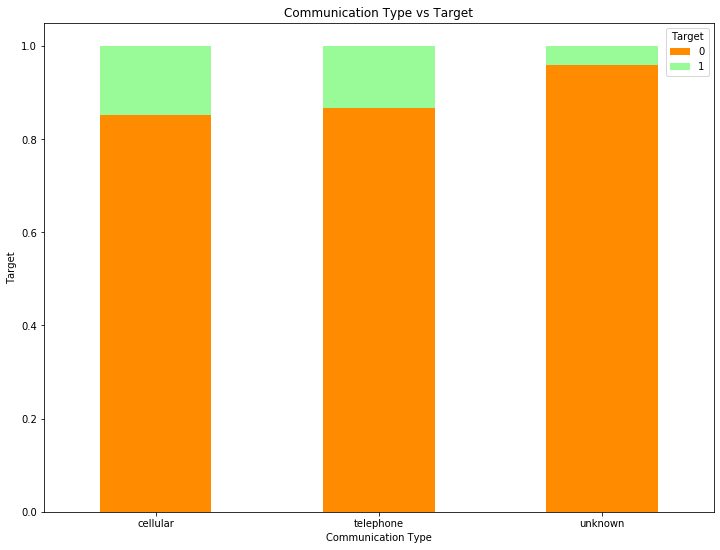

In [91]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
bank_CT.div(bank_CT.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Communication Type vs Target')
plt.xlabel("Communication Type")
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.show()

# Observations:

-> Looks like if the customer is being contacted for the first time for this campaign is more likely to sucscribe to the term deposit.If the customer has been already called more than 2 times before this campaign that would likely result in not subscribing for the term deopsit.

-> Conversion % is highest when the customer is contacted through cellular.

# Outcome of Previous Campaign

In [92]:
categorcial_variables = ['Outcome of Previous Campaign']

In [93]:
bank['Outcome of Previous Campaign'].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: Outcome of Previous Campaign, dtype: float64

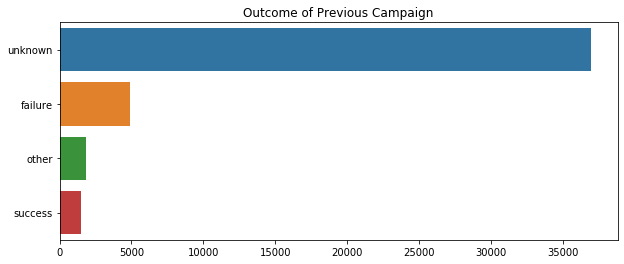

In [94]:
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)
    

# observation:

->In most cases, the outcome of the previous campaign is not known. This might be a useful information to track in future.

In [95]:
bank["Outcome of Previous Campaign"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: Outcome of Previous Campaign, dtype: int64

In [96]:
bank_OPC=pd.crosstab(bank["Outcome of Previous Campaign"],bank["Target"])
print(bank_OPC)

Target                            0     1
Outcome of Previous Campaign             
failure                        4283   618
other                          1533   307
success                         533   978
unknown                       33573  3386


In [97]:
failure_percentage = ((618)/(4901))*100
other_percentage = ((307)/(1840))*100
success_percentage = ((978)/(1511))*100
unknown_percentage = ((3386)/(36959))*100
print('perentage of failure people agreeing  for term deposit: ',failure_percentage)
print('perentage of other people agreeing  for term deposit: ',other_percentage)
print('perentage of success people agreeing  for term deposit: ',success_percentage)
print('perentage of unknown people agreeing  for term deposit: ',unknown_percentage)

perentage of failure people agreeing  for term deposit:  12.609671495613139
perentage of other people agreeing  for term deposit:  16.684782608695652
perentage of success people agreeing  for term deposit:  64.72534745201854
perentage of unknown people agreeing  for term deposit:  9.161503287426607


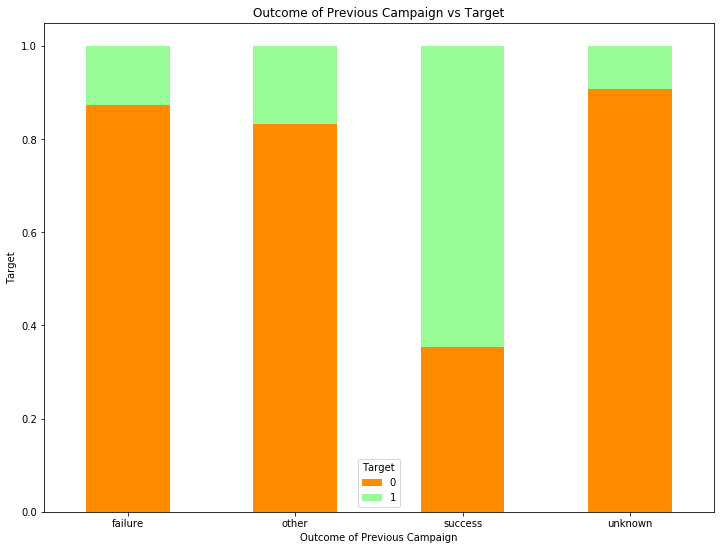

In [98]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
bank_OPC.div(bank_OPC.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Outcome of Previous Campaign vs Target')
plt.xlabel("Outcome of Previous Campaign")
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.show()

# Observations:

-> But, those with previous outcome as success have the highest subscription share to the term deposit.

# Target

In [99]:
bank["Target"].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [100]:
bank['Target'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Target, dtype: float64

In [101]:
IMBALANCE_percentage = ((5289)/(45211))*100
print('perentage of IMBALANCE: ',IMBALANCE_percentage)

perentage of IMBALANCE:  11.698480458295547


# lets check our target variable and see if the data is balanced or not

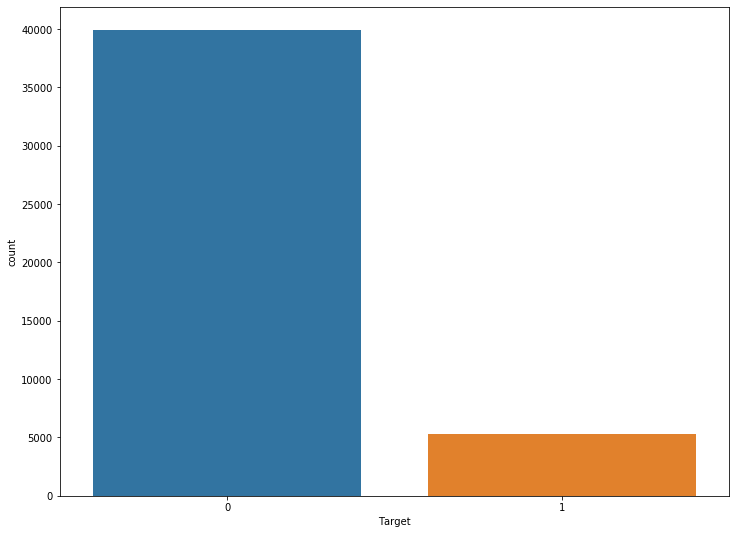

In [102]:
sns.countplot(x="Target",data=bank)
plt.show()

# Observation:

The count of the ‘zeros’ are 88% and ‘ones’ are 12%. This indicates that the dataset has a class imbalance for the Y variable.

# Why we didnt treated to class imbalance?

For treating the class imbalance we can do over-sampling or under-sampling techniques,but by doing this no new info is generated.

# MULTIVARIATE ANALYSIS

# The Correltion matrix

In [103]:
corr = bank.corr()
corr

,Age,Average Yearly Balance,Last Contact Day,Last Call Duration,No of Campaign,No of days passed after last contact,Previous Contact Before Campaign,Target
Age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023841,0.001288,0.025155
Average Yearly Balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003330,0.016674,0.052838
Last Contact Day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093024,-0.051710,-0.028348
Last Call Duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001584,0.001203,0.394521
No of Campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088508,-0.032855,-0.073172
No of days passed after last contact,-0.023841,0.003330,-0.093024,-0.001584,-0.088508,1.000000,0.454288,0.103323
Previous Contact Before Campaign,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454288,1.000000,0.093236
Target,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103323,0.093236,1.000000


# Heatmap to check correlation 

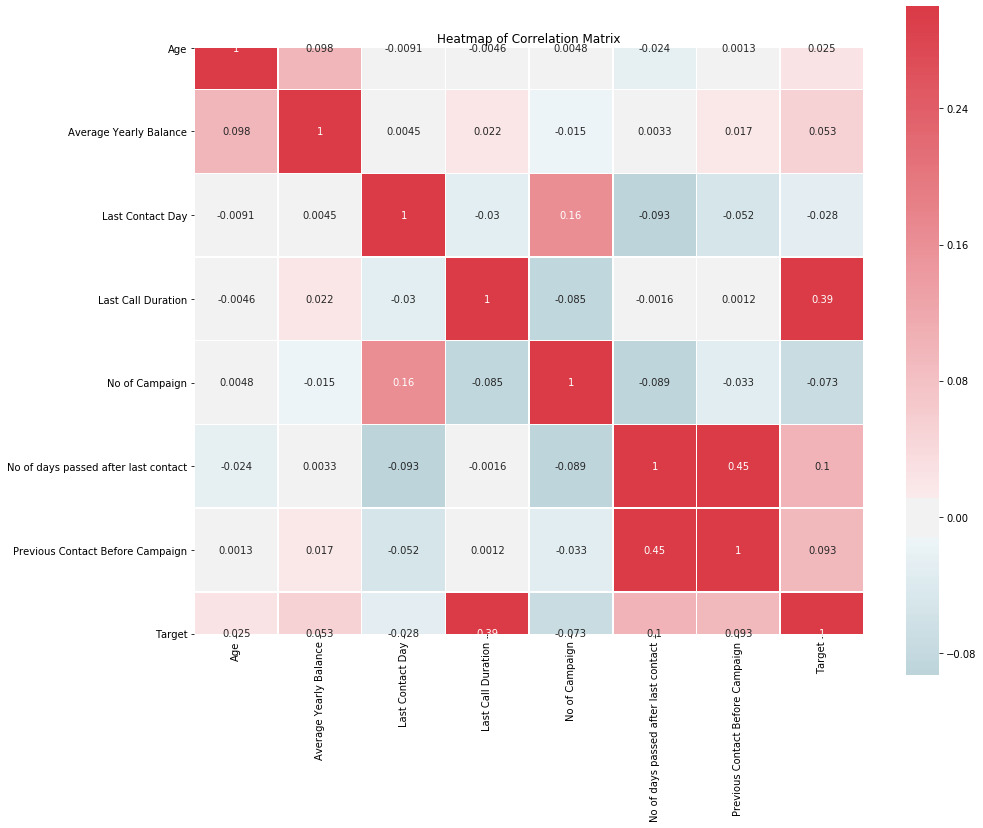

In [104]:
plt.figure(figsize = (15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap,
            vmax=.3, center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')
plt.show()

# OBSERVATION:

# GET DUMMIES ENCODER

Get dummies is a common way to create dummy variables for categorical features. While it is widely used, there are some drawbacks. First, it modifies your data frame. When you have a categorical feature with hundreds of categories, get dummies adds hundreds of dummy variables to the data frame.

And you may need to drop the categorical feature after creating dummies if you want to quickly assign features to X (independent variables). Another thing about get dummies is, if there are many categorical features in the dataset, you will have to do get dummies for every feature. Even
constructing a loop to do so is a lot code to write.

In [105]:
X = bank.drop('Target',axis=1)
y = bank.Target

In [106]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [107]:
X.columns

Index(['Age', 'Average Yearly Balance', 'Last Contact Day',
       'Last Call Duration', 'No of Campaign',
       'No of days passed after last contact',
       'Previous Contact Before Campaign', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Job_unknown', 'Marital Status_married',
       'Marital Status_single', 'Education_secondary', 'Education_tertiary',
       'Education_unknown', 'Credit Default_yes', 'Housing Loan_yes',
       'Personal Loan_yes', 'Communication Type_telephone',
       'Communication Type_unknown', 'Last Contact Month_aug',
       'Last Contact Month_dec', 'Last Contact Month_feb',
       'Last Contact Month_jan', 'Last Contact Month_jul',
       'Last Contact Month_jun', 'Last Contact Month_mar',
       'Last Contact Month_may', 'Last Contact Month_nov',
       'Last Contact Month_oct', 'Last Contact Month_sep',

# Here we will be looking at recall instead of accuracy,because we have imbalanced dataset ,in imbalanced dataset we should not look at accuracy otherwise it will be biased towards one class.

# Lets Start Building the Models

1)Logistic Regression

2)Decision Tree

3)Random Forest

# Here we are only using these three algorithms our main aim is to get the most important features that will affect our y variable.We have taken a good combination of parametric and non-parametric models.

# LogisticRegression

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [109]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [110]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

C:\Users\ADMIN\MEGHA\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.238318
         Iterations 8


In [111]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Thu, 28 Nov 2019   Pseudo R-squ.:                  0.3424
Time:                        13:49:28   Log-Likelihood:                -7542.1
converged:                       True   LL-Null:                       -11469.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.4843      0.220    -11.314      0.000      -2.915      -2.054
Age                                     -0.0015      

# Important points about Odds ratio:
 

Calculated in case-control studies as incidence of outcome is not known

->OR >1 indicates increased occurrence of event

->OR <1 indicates decreased occurrence of event (protective exposure)

Look at CI and P value for statistical significance of value in rare outcomes OR = RR (RR = Relative Risk). This applies when the incidence of disease is <
10%

In [112]:
#Calculate Odds Ratio
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef
lgcoef.to_csv('logit.csv')

In [113]:
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Outcome of Previous Campaign_success,2.30,10.01,0.91,0.00
Last Contact Month_mar,1.67,5.31,0.84,0.00
Last Contact Month_sep,0.95,2.59,0.72,0.00
Last Contact Month_oct,0.83,2.29,0.70,0.00
Last Contact Month_dec,0.57,1.77,0.64,0.01
Last Contact Month_jun,0.43,1.54,0.61,0.00
Education_tertiary,0.42,1.51,0.60,0.00
Education_unknown,0.36,1.44,0.59,0.00
Education_secondary,0.25,1.28,0.56,0.00
Last Contact Day,0.01,1.01,0.50,0.00


# Observation:

-> As we can see from the previous slide, the Odds ratio of Outcome of Previous Campaign is 10.77 which means the odds that the customer might respond to the campaign is 10 times higher. In other
words, If the outcome of the previous campaign is successful, the probability that the customer will respond to the campaign is 92%.

->Likewise, if we make a contact to our existing clients in the month of March we have a 83% chance the client may take up the term deposit.

->Compared to all the Job Categories, Students have a 60% probability of applying for a term deposit.

In [114]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\ADMIN\MEGHA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
logreg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# CONFUSION MATRIX:

In [116]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[27244   677]
 [ 2403  1323]]


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27921
           1       0.66      0.36      0.46      3726

    accuracy                           0.90     31647
   macro avg       0.79      0.67      0.70     31647
weighted avg       0.89      0.90      0.89     31647



In [118]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[11660   341]
 [ 1015   548]]


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12001
           1       0.62      0.35      0.45      1563

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



In [120]:
from sklearn.metrics import accuracy_score
print(logreg.score(X_train,y_train))

0.902676399026764


In [121]:
from sklearn.metrics import accuracy_score
print(logreg.score(X_test,y_test))

0.90002948982601


# Function to visualise confusion matrix

In [122]:
#Function to visulise confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

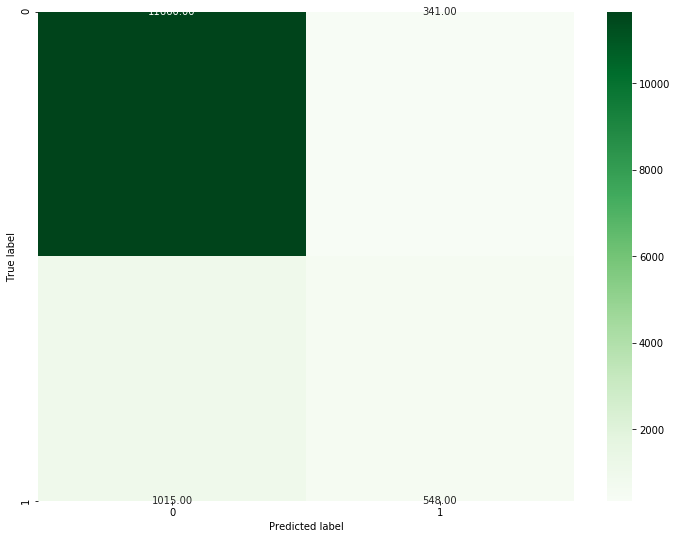

In [123]:
draw_cm(y_test, pred_test)

# For us False Negative is more critical ie our main focus is on the people who have suscribed for term deposit but our model is predicting they have not suscribed.

-> Positive/Negative:
Type of Class (label) ["No", "Yes"] True/False: Correctly or incorrectly classified by the model.

-> True Negatives (Top-Left Square):
This is the number of correctly classifications of the "No" class or potential clients are 11662 that
are not willing to subscribe a term deposit.

-> False Negatives (Bottom-left Square):
This is the number of incorrectly classifications of the "No" class or potential clients are 1043 that
are not willing to subscribe a term deposit.

-> False Positives (Top-Right Square):
This is the number of incorrectly classifications of the "Yes" class or potential clients are 311 that
are willing to subscribe a term deposit.

-> True Positives (Bottom-Right Square):
This is the number of correctly classifications of the "Yes" class or potential clients are 548 that
are willing to subscribe a term deposit. 

In [124]:
#Get predicted probabilites
target_probailities_log = logreg.predict_proba(X_test)[:,1]

In [125]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

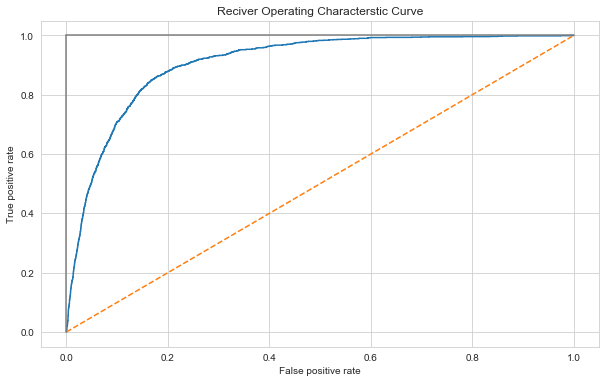

In [126]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [127]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,pred_test))

0.6610967533469033


In [128]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,pred_train))

0.6654127406050923


In [129]:


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_test))

0.90002948982601


In [130]:
auc_score = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )


0.91

In [131]:
logreg.predict_proba(X_test)

array([[0.94801723, 0.05198277],
       [0.96224426, 0.03775574],
       [0.91510484, 0.08489516],
       ...,
       [0.89895599, 0.10104401],
       [0.90142887, 0.09857113],
       [0.95310175, 0.04689825]])

In [132]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.05198277, 0.03775574, 0.08489516, ..., 0.10104401, 0.09857113,
       0.04689825])

# Changing the cutoff value for prediction

In [133]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))
threshold_list = [0.05,0.06,0.08,0.1,0.2,0.3,0.4,0.5,.7,.75,.8]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.recall_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing recall is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing recall is 0.96
[[7404 4597]
 [  65 1498]]

******** For i = 0.06 ******
Our testing recall is 0.94
[[8159 3842]
 [  95 1468]]

******** For i = 0.08 ******
Our testing recall is 0.90
[[9143 2858]
 [ 150 1413]]

******** For i = 0.1 ******
Our testing recall is 0.87
[[9718 2283]
 [ 204 1359]]

******** For i = 0.2 ******
Our testing recall is 0.67


C:\Users\ADMIN\MEGHA\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ADMIN\MEGHA\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\ADMIN\MEGHA\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ADMIN\MEGHA\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


[[10910  1091]
 [  508  1055]]

******** For i = 0.3 ******
Our testing recall is 0.53
[[11344   657]
 [  727   836]]

******** For i = 0.4 ******
Our testing recall is 0.44
[[11549   452]
 [  879   684]]

******** For i = 0.5 ******
Our testing recall is 0.35
[[11660   341]
 [ 1015   548]]

******** For i = 0.7 ******
Our testing recall is 0.21
[[11825   176]
 [ 1230   333]]

******** For i = 0.75 ******
Our testing recall is 0.18
[[11860   141]
 [ 1288   275]]

******** For i = 0.8 ******
Our testing recall is 0.15
[[11896   105]
 [ 1335   228]]


# Histogram of predicted probabilities

Text(0, 0.5, 'Frequency')

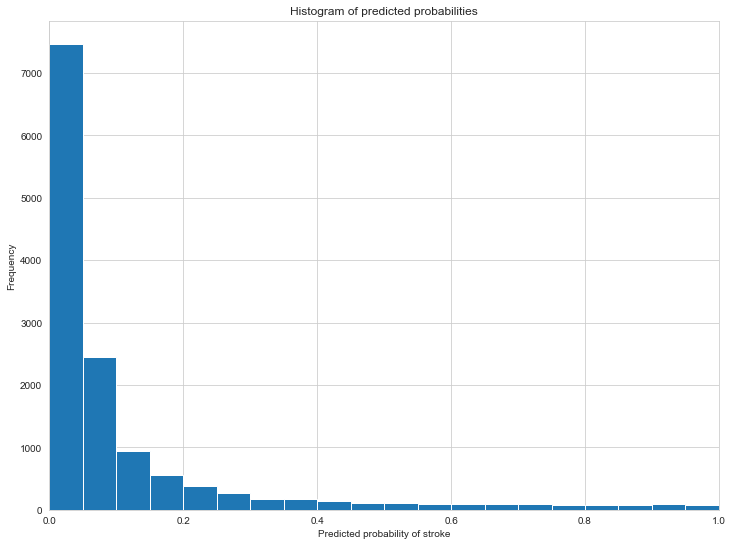

In [134]:


# 8 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of stroke')
plt.ylabel('Frequency')

# DecisionTree

In [135]:
from sklearn.tree import DecisionTreeClassifier
#Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)

In [136]:
X_train.shape,X_test.shape

((31647, 42), (13564, 42))

In [137]:
y_train

19100    0
37958    0
12451    0
18263    0
5128     0
        ..
7763     1
15377    0
17730    0
28030    0
15725    0
Name: Target, Length: 31647, dtype: int64

# Model1:- Criterion='gini

In [138]:
model_gini=DecisionTreeClassifier()

In [139]:
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [140]:
preds_gini = model_gini.predict(X_test)

In [141]:
pred_gini2 = model_gini.predict(X_train)

In [142]:
print(metrics.classification_report(y_train,pred_gini2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27924
           1       1.00      1.00      1.00      3723

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



In [143]:
print(metrics.roc_auc_score(y_train,pred_gini2))

1.0


# Evaluation metrics

In [144]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[11109   889]
 [  836   730]]


In [145]:
from sklearn.metrics import accuracy_score
print(model_gini.score(X_train,y_train))

1.0


In [146]:
from sklearn.metrics import accuracy_score
print(model_gini.score(X_test,y_test))

0.8728251253317605


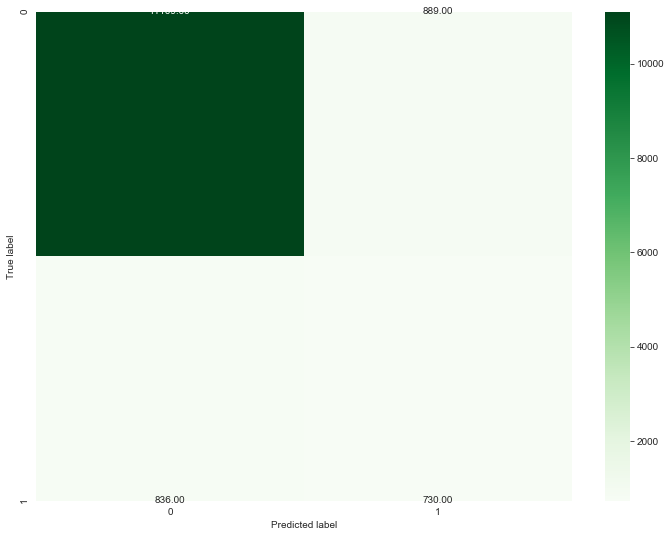

In [147]:
def draw_cm( actual, predicted ):
   cm = metrics.confusion_matrix( actual, predicted, [0,1] )
   sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
plt.show()
draw_cm(y_test, preds_gini)

In [148]:
#Calculate accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
print(accuracy_score(y_test,preds_gini))
print(recall_score(y_test,preds_gini))

0.8728251253317605
0.4661558109833972


In [149]:
print(metrics.classification_report(y_test,preds_gini))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11998
           1       0.45      0.47      0.46      1566

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



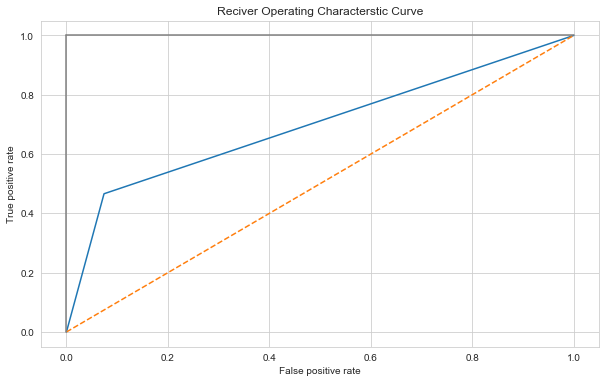

In [150]:
#Get predicted probabilites
target_probailities_log = model_gini.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_gini,tree_true_positive_gini,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_gini,tree_true_positive_gini)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [151]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_gini))

0.6960300641848142


In [152]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_gini))

0.6960300641848142


# Model2:- Criterion='Entropy'

In [153]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [154]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [155]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [156]:
from sklearn.metrics import accuracy_score
print(model_entropy.score(X_train,y_train))

1.0


In [157]:
from sklearn.metrics import accuracy_score
print(model_entropy.score(X_test,y_test))

0.8813771748746683


# Evaluation metrics

In [158]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[11233   765]
 [  844   722]]


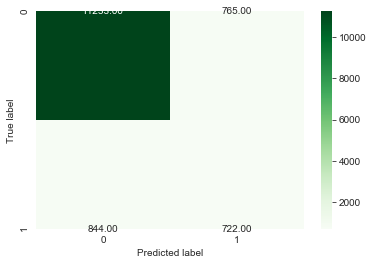

In [159]:
def draw_cm( actual, predicted ):
   cm = metrics.confusion_matrix( actual, predicted, [0,1] )
   sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
plt.show()
draw_cm(y_test, preds_entropy)

In [160]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

0.8813771748746683
1.0


In [161]:
print(metrics.classification_report(y_test,preds_entropy))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11998
           1       0.49      0.46      0.47      1566

    accuracy                           0.88     13564
   macro avg       0.71      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



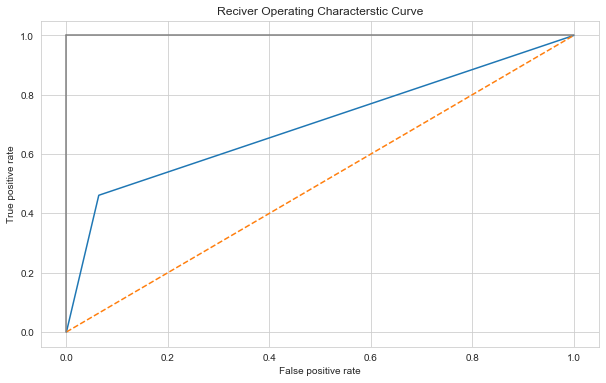

In [162]:
#Get predicted probabilites
target_probailities_log = model_entropy.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_entropy,tree_true_positive_entropy,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_entropy,tree_true_positive_entropy)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [163]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_entropy))

0.698643313689787


In [164]:
print(roc_auc_score(y_train,preds_entropy_train))

1.0


In [165]:
print(classification_report(y_train,preds_entropy_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27924
           1       1.00      1.00      1.00      3723

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



# The tree is overgrown due to which there is overfitting - we will now prune the tree and re-evaluate the model.





# PRUNING

In [166]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                              max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[11654   344]
 [  993   573]]


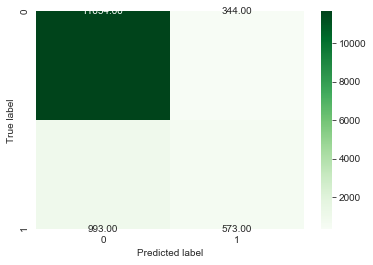

In [167]:
def draw_cm( actual, predicted ):
   cm = metrics.confusion_matrix( actual, predicted, [0,1] )
   sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
plt.show()
draw_cm(y_test, preds_pruned)

In [168]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))


0.9014302565614863
0.9044143204727146


In [169]:
print(metrics.classification_report(y_test,preds_pruned))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11998
           1       0.62      0.37      0.46      1566

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



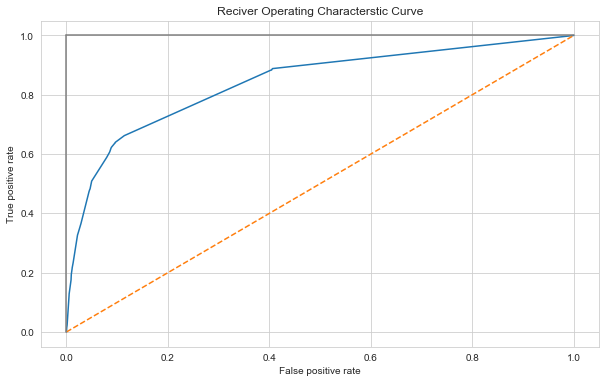

In [170]:
#Get predicted probabilites
target_probailities_log = clf_pruned.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_pruned,tree_true_positive_pruned,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_pruned,tree_true_positive_pruned)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [171]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,preds_pruned))

0.6686144689504444


In [172]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,preds_pruned_train))

0.6822014652179549


In [173]:
from sklearn.metrics import roc_auc_score
print(classification_report(y_train,preds_pruned_train))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     27924
           1       0.66      0.39      0.49      3723

    accuracy                           0.90     31647
   macro avg       0.79      0.68      0.72     31647
weighted avg       0.89      0.90      0.89     31647



# Calculating feature importance(DT)

In [174]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))


feat importance = [2.40248762e-03 2.53645915e-04 1.04792877e-04 3.56957859e-02
 1.05915783e-04 5.44599936e-04 4.99356392e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.24821581e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.14729200e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.75330373e-05 0.00000000e+00 0.00000000e+00 1.38276039e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.00060723e-03 2.57180009e-04
 0.00000000e+00 6.65783846e-04 0.00000000e+00 0.00000000e+00
 1.90617210e-02 0.00000000e+00]


In [175]:
feature_cols = X.columns
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(12)

,0
Last Call Duration,0.56
Outcome of Previous Campaign_success,0.30
Last Contact Month_mar,0.05
Age,0.04
Communication Type_unknown,0.02
Last Contact Month_oct,0.01
No of days passed after last contact,0.01
Last Contact Month_may,0.00
Average Yearly Balance,0.00
Job_management,0.00


In [176]:
# print the first 10 predicted probabilities of class membership
clf_pruned.predict_proba(X_test)[0:10]

array([[0.86106033, 0.13893967],
       [0.97933349, 0.02066651],
       [0.97933349, 0.02066651],
       [0.90823928, 0.09176072],
       [0.97933349, 0.02066651],
       [0.97933349, 0.02066651],
       [0.97933349, 0.02066651],
       [0.90823928, 0.09176072],
       [0.90823928, 0.09176072],
       [0.97933349, 0.02066651]])

In [177]:
# store the predicted probabilities for class 1
y_pred_prob = clf_pruned.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([0.02066651, 0.02066651, 0.09176072, 0.02066651, 0.02066651,
       0.02066651, 0.09176072, 0.09176072, 0.02066651, 0.02066651,
       0.09176072, 0.09176072, 0.09176072, 0.09176072, 0.09176072,
       0.02066651, 0.67307692, 0.02066651, 0.02066651])

Text(0, 0.5, 'Frequency')

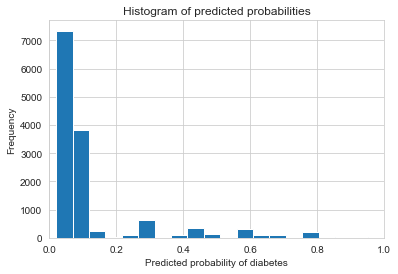

In [178]:
# histogram of predicted probabilities

# 20 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [179]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(clf_pruned.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.17,0.19,0.2,0.25,0.3,0.4,0.5,0.6,.7,.8,.9,.99]
for i in threshold_list:
   print ('\n******** For i = {} ******'.format(i))
   y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
   test_accuracy = metrics.recall_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                          y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
   print('Our testing recall score  is {:.2f}'.format(test_accuracy))

   print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                          y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing recall score  is 0.88
[[7162 4836]
 [ 183 1383]]

******** For i = 0.1 ******
Our testing recall score  is 0.66
[[10629  1369]
 [  529  1037]]

******** For i = 0.15 ******
Our testing recall score  is 0.64
[[10840  1158]
 [  564  1002]]

******** For i = 0.17 ******
Our testing recall score  is 0.64
[[10840  1158]
 [  564  1002]]

******** For i = 0.19 ******
Our testing recall score  is 0.64
[[10840  1158]
 [  564  1002]]

******** For i = 0.2 ******


C:\Users\ADMIN\MEGHA\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\ADMIN\MEGHA\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ADMIN\MEGHA\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ADMIN\MEGHA\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


Our testing recall score  is 0.64
[[10851  1147]
 [  568   998]]

******** For i = 0.25 ******
Our testing recall score  is 0.62
[[10932  1066]
 [  590   976]]

******** For i = 0.3 ******
Our testing recall score  is 0.59
[[11046   952]
 [  644   922]]

******** For i = 0.4 ******
Our testing recall score  is 0.48
[[11446   552]
 [  813   753]]

******** For i = 0.5 ******
Our testing recall score  is 0.37
[[11654   344]
 [  993   573]]

******** For i = 0.6 ******
Our testing recall score  is 0.21
[[11864   134]
 [ 1232   334]]

******** For i = 0.7 ******
Our testing recall score  is 0.13
[[11934    64]
 [ 1365   201]]

******** For i = 0.8 ******
Our testing recall score  is 0.02
[[11986    12]
 [ 1536    30]]

******** For i = 0.9 ******
Our testing recall score  is 0.01
[[11991     7]
 [ 1544    22]]

******** For i = 0.99 ******
Our testing recall score  is 0.00
[[11996     2]
 [ 1565     1]]


In [180]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [181]:
clf = DecisionTreeClassifier()

param_grid = {
   'max_depth': [3, 4, 5,6,7,8],
   }

scorers = {
   'precision_score': make_scorer(precision_score),
   'recall_score': make_scorer(recall_score),
   'accuracy_score': make_scorer(accuracy_score)
}

In [182]:
def grid_search_wrapper(refit_score='precision_score'):
   """
   fits a GridSearchCV classifier using refit_score for optimization
   prints classifier performance metrics
   """
   skf = StratifiedKFold(n_splits=10)
   grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                          cv=skf, return_train_score=True, n_jobs=-1)
   grid_search.fit(X_train.values, y_train.values)

   # make the predictions
   y_pred = grid_search.predict(X_test.values)

   print('Best params for {}'.format(refit_score))
   print(grid_search.best_params_)

   # confusion matrix on the test data.
   print('\nConfusion matrix of optimized for {} on the test data:'.format(refit_score))
   print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
   return grid_search
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'max_depth': 8}

Confusion matrix of optimized for recall_score on the test data:
     pred_neg  pred_pos
neg     11573       425
pos       918       648


In [183]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth']].round(3) 

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth
0,0.66,0.32,0.90,3
1,0.65,0.37,0.90,4
2,0.64,0.36,0.90,5
4,0.63,0.40,0.90,7
3,0.63,0.38,0.90,6
5,0.61,0.41,0.90,8


In [184]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

In [185]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [186]:
def adjusted_classes(y_scores, t):
   """
   This function adjusts class predictions based on the prediction threshold (t).
   Will only work for binary classification problems.
   """
   return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
   """
   plots the precision recall curve and shows the current value for each
   by identifying the classifier's threshold (t).
   """
   
   # generate new class predictions based on the adjusted_classes
   # function above and view the resulting confusion matrix.
   y_pred_adj = adjusted_classes(y_scores, t)
   print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                      columns=['pred_neg', 'pred_pos'],
                      index=['neg', 'pos']))

In [187]:
precision_recall_threshold(p, r, thresholds, 0.17)

     pred_neg  pred_pos
neg     10823      1175
pos       546      1020


In [188]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
   """
   Modified from:
   Hands-On Machine learning with Scikit-Learn
   and TensorFlow; p.89
   """
   plt.figure(figsize=(8, 8))
   plt.title("Precision and Recall Scores as a function of the decision threshold")
   plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
   plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
   plt.ylabel("Score")
   plt.xlabel("Decision Threshold")
   plt.legend(loc='best')

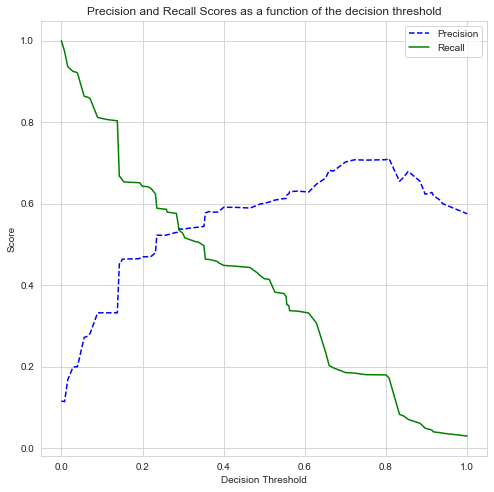

In [189]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

# RANDOM FOREST

In [190]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")


In [191]:
training_set, test_set, class_set, test_class_set = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [192]:
fit_rf = RandomForestClassifier(random_state=42)

In [193]:
fit_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [194]:
predictions = fit_rf.predict(X_test)

In [195]:
predictions_train = fit_rf.predict(X_train)

In [196]:
from sklearn.metrics import classification_report,confusion_matrix

In [197]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11998
           1       0.61      0.33      0.43      1566

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [198]:
print(classification_report(y_train,predictions_train)) 


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27924
           1       1.00      0.93      0.96      3723

    accuracy                           0.99     31647
   macro avg       0.99      0.96      0.98     31647
weighted avg       0.99      0.99      0.99     31647



In [199]:
print(roc_auc_score(y_train,predictions_train)) 

0.9645626421710315


In [200]:
print(confusion_matrix(y_test,predictions))

[[11668   330]
 [ 1044   522]]


In [201]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.8987024476555588


In [202]:
from sklearn.metrics import accuracy_score
print(fit_rf.score(X_train,y_train))

0.9912787941985022


In [203]:
from sklearn.metrics import accuracy_score
print(fit_rf.score(X_test,y_test))

0.8987024476555588


In [204]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.8987024476555588


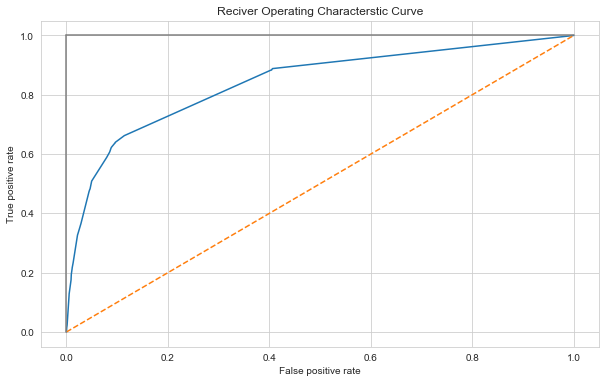

In [205]:
#Get predicted probabilites
target_probailities_log = clf_pruned.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_RF,tree_true_positive_RF,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_RF,tree_true_positive_RF)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [206]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.6529143746179918


In [207]:
#Function to visulise confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.show()

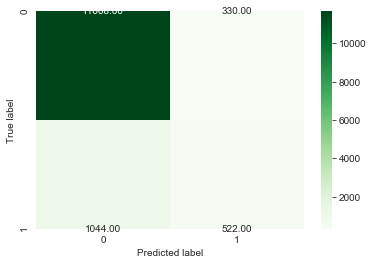

In [208]:
draw_cm(y_test, predictions)

In [209]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [210]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [211]:
feat_labels = ['Age', 'Job', 'Marital Status', 'Education', 'Credit Default',
       'Average Yearly Balance', 'Housing Loan', 'Personal Loan',
       'Communication Type', 'Last Contact Day', 'Last Contact Month',
       'Last Call Duration', 'No of Campaign',
       'No of days passed after last contact',
       'Previous Contact Before Campaign', 'Outcome of Previous Campaign']

In [212]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [213]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

# Checking Variable Importance

In [214]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Age', 0.09706395741823706)
('Job', 0.09855087478554386)
('Marital Status', 0.08571117561320016)
('Education', 0.2727593152183011)
('Credit Default', 0.0392566440041193)
('Average Yearly Balance', 0.039746094814727156)
('Housing Loan', 0.02077425562085029)
('Personal Loan', 0.009046239053435134)
('Communication Type', 0.0036067932128967164)
('Last Contact Day', 0.003189039535590059)
('Last Contact Month', 0.010812713099314109)
('Last Call Duration', 0.005278144922350055)
('No of Campaign', 0.004654352312938366)
('No of days passed after last contact', 0.00640905398373371)
('Previous Contact Before Campaign', 0.005021790476241874)
('Outcome of Previous Campaign', 0.011411043547778183)


# Fitting Random Forest

In [215]:
fit_rf = RandomForestClassifier(random_state=42)

In [216]:
param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

In [217]:
training_set, test_set, class_set, test_class_set = train_test_split(X,y,test_size = 0.20,random_state = 42)

# Check Cross Validation¶
Cross validation is a powerful tool that is used for estimating the predictive power of your model, and it performs better than the conventional training and test set. Using cross validation, we can create multiple training and test sets and average the scores to give us a less biased metric.


# K-FOLD Cross Validation

In [218]:
def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True):
   my_estimators = {
   'rf': 'estimators_',
   'nn': 'out_activation_',
   'knn': '_fit_method'
   }
   try:
       # Captures whether first parameter is a model
       if not hasattr(fit, 'fit'):
           return print("'{0}' is not an instantiated model from scikit-learn".format(fit))

       # Captures whether the model has been trained
       if not vars(fit)[my_estimators[estimator]]:
           return print("Model does not appear to be trained.")

   except KeyError as e:
       print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
       raise

   n = KFold(n_splits=10)
   scores = cross_val_score(fit,
                        training_set,
                        class_set,
                        cv = n)
   if print_results:
       for i in range(0, len(scores)):
           print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
       print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
             .format(scores.mean(), scores.std() / 2))
   else:
       return scores.mean(), scores.std() / 2

In [219]:
def create_conf_mat(test_class_set, predictions):
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

# Set best parameters given by grid search.

In [220]:
fit_rf.set_params(criterion = 'gini',max_features = 'log2',max_depth = 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Traditional Training and Test Set Split for Random Forest

In [221]:
fit_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [222]:
fit_rf.fit(training_set, class_set)
predictions_rf = fit_rf.predict(test_set)

In [223]:
predictions_rf_train= fit_rf.predict(training_set)

In [224]:
def create_conf_mat(test_class_set, predictions):
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

# Evaluation Metrics

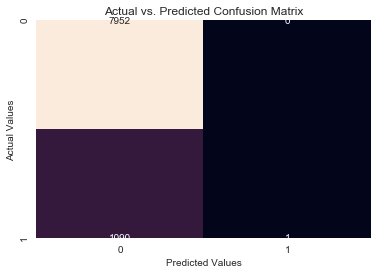

In [225]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [226]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.879


In [227]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1205


In [228]:
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]

fpr2, tpr2, _ = roc_curve(test_class_set,predictions_prob,pos_label = 1)

In [229]:
auc_rf = auc(fpr2, tpr2)

In [230]:
cross_val_metrics(fit_rf,
                 training_set,
                 class_set,
                 'rf',
                 print_results = True)

Cross validation run 0:  0.884
Cross validation run 1:  0.895
Cross validation run 2:  0.880
Cross validation run 3:  0.873
Cross validation run 4:  0.884
Cross validation run 5:  0.886
Cross validation run 6:  0.887
Cross validation run 7:  0.886
Cross validation run 8:  0.878
Cross validation run 9:  0.887
Accuracy:  0.884 (+/-  0.003)


# ROC Curve Metrics¶
A receiver operating characteristic (ROC) curve calculates the false positive rates and true positive rates across different thresholds. Let's graph these calculations.


In [231]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    my_estimators = {'Decision tree': ['Decision tree', 'Great Learning'],
              'rf': ['Random Forest', 'red']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

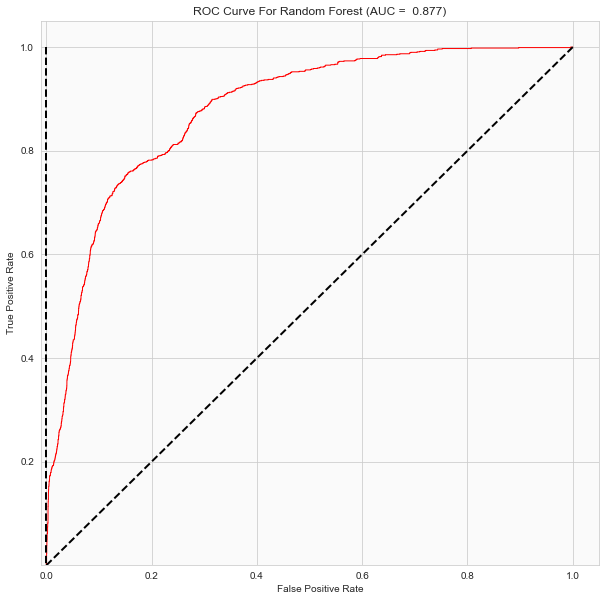

In [232]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

# Classification Report

In [233]:
def print_class_report(predictions, alg_name):
   print('Classification Report for {0}:'.format(alg_name))
   print(classification_report(predictions,
           test_class_set,
           target_names = '01'))
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      9042
           1       0.00      1.00      0.00         1

    accuracy                           0.88      9043
   macro avg       0.50      0.94      0.47      9043
weighted avg       1.00      0.88      0.94      9043



In [234]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(test_class_set,predictions_rf))

0.5004582951420715


In [235]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(class_set,predictions_rf_train))

0.5001191043353979


In [236]:
from sklearn.metrics import roc_auc_score
print(classification_report(class_set,predictions_rf_train))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     31970
           1       1.00      0.00      0.00      4198

    accuracy                           0.88     36168
   macro avg       0.94      0.50      0.47     36168
weighted avg       0.90      0.88      0.83     36168



In [237]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_class_set,predictions_rf))

0.8794647793873714


In [238]:
from sklearn.metrics import accuracy_score
print(fit_rf.score(X_train,y_train))

0.883506598835066


In [239]:
from sklearn.metrics import accuracy_score
print(fit_rf.score(X_test,y_test))

0.8823887199336466


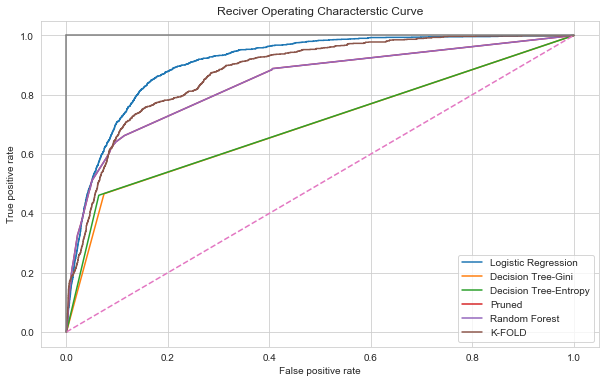

In [240]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_gini,tree_true_positive_gini,label='Decision Tree-Gini')
plt.plot(tree_false_positive_entropy,tree_true_positive_entropy,label='Decision Tree-Entropy')
plt.plot(tree_false_positive_pruned,tree_true_positive_pruned,label='Pruned')
plt.plot(tree_false_positive_RF,tree_true_positive_RF,label='Random Forest')
plt.plot(fpr2, tpr2,label='K-FOLD')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


In [241]:
final_result_train_0 = pd.DataFrame({
    "Model":["Logistic Regression","Gini","Entropy","Pruning","Random Forest","K-Fold"],
 "Precision":[0.92,0.93,0.93,0.92,0.92,1],
 "Recall":[0.97,0.93,0.94,0.97,0.97,0.88],
 "Accuracy Score":[0.90,0.87,0.88,0.90,0.89,0.87],
 "ROC/AUC Score":[0.66,0.69,0.69,0.66,0.65,0.50],
 "F1_score":[0.95,0.93,0.93,0.95,0.94,0.94]
})

In [242]:
final_result_train_0

,Model,Precision,Recall,Accuracy Score,ROC/AUC Score,F1_score
0,Logistic Regression,0.92,0.97,0.90,0.66,0.95
1,Gini,0.93,0.93,0.87,0.69,0.93
2,Entropy,0.93,0.94,0.88,0.69,0.93
3,Pruning,0.92,0.97,0.90,0.66,0.95
4,Random Forest,0.92,0.97,0.89,0.65,0.94
5,K-Fold,1.00,0.88,0.87,0.50,0.94


In [243]:
final_result_test_0 = pd.DataFrame({
    "Model":["Logistic Regression","Gini","Entropy","Pruning","Random Forest","K-Fold"],
    "Train_score":[0.90,1,1,0.90,0.99,0.88],
    "Test_score":[0.90,0.87,0.88,0.90,0.89,0.88],
 "Precision":[0.92,0.93,0.93,0.92,0.92,1],
 "Recall":[0.97,0.93,0.94,0.97,0.97,0.88],
 "Accuracy Score":[0.90,0.87,0.88,0.90,0.89,0.87],
 "ROC/AUC Score":[0.66,0.69,0.69,0.66,0.65,0.50],
 "F1_score":[0.95,0.93,0.93,0.95,0.94,0.94]

})

In [244]:
final_result_test_0

,Model,Train_score,Test_score,Precision,Recall,Accuracy Score,ROC/AUC Score,F1_score
0,Logistic Regression,0.90,0.90,0.92,0.97,0.90,0.66,0.95
1,Gini,1.00,0.87,0.93,0.93,0.87,0.69,0.93
2,Entropy,1.00,0.88,0.93,0.94,0.88,0.69,0.93
3,Pruning,0.90,0.90,0.92,0.97,0.90,0.66,0.95
4,Random Forest,0.99,0.89,0.92,0.97,0.89,0.65,0.94
5,K-Fold,0.88,0.88,1.00,0.88,0.87,0.50,0.94


In [245]:
final_result_train_1 = pd.DataFrame({
    "Model":["Logistic Regression","Gini","Entropy","Pruning","Random Forest","K-Fold"],
    "Train_score":[0.90,1,1,0.90,0.99,0.88],
    "Test_score":[0.90,0.87,0.88,0.90,0.89,0.88],
 "Precision":[0.65,0.1,1,0.66,1,1],
 "Recall":[0.35,1,1,0.39,0.93,0],
 "Accuracy Score":[0.90,1,1,0.90,0.99,0.88],
 "ROC/AUC Score":[0.66,0.69,0.69,0.66,0.65,0.50],
 "F1_score":[0.46,1,1,0.49,0.96,0]
})

In [246]:
final_result_train_1 

,Model,Train_score,Test_score,Precision,Recall,Accuracy Score,ROC/AUC Score,F1_score
0,Logistic Regression,0.90,0.90,0.65,0.35,0.90,0.66,0.46
1,Gini,1.00,0.87,0.10,1.00,1.00,0.69,1.00
2,Entropy,1.00,0.88,1.00,1.00,1.00,0.69,1.00
3,Pruning,0.90,0.90,0.66,0.39,0.90,0.66,0.49
4,Random Forest,0.99,0.89,1.00,0.93,0.99,0.65,0.96
5,K-Fold,0.88,0.88,1.00,0.00,0.88,0.50,0.00


In [247]:
final_result_test_1 = pd.DataFrame({
    "Model":["Logistic Regression","Gini","Entropy","Pruning","Random Forest","K-Fold"],
    "Train_score":[0.90,1,1,0.90,0.99,0.88],
    "Test_score":[0.90,0.87,0.88,0.90,0.89,0.88],
 "Precision":[0.64,0.45,0.49,0.62,0.61,0],
 "Recall":[0.34,0.47,0.46,0.37,0.33,1],
 "Accuracy Score":[0.90,0.87,0.88,0.90,0.90,0.88],
 "ROC/AUC Score":[0.66,0.69,0.69,0.66,0.65,0.50],
 "F1_score":[0.44,0.46,0.47,0.46,0.43,0]
})

In [248]:
final_result_test_1

,Model,Train_score,Test_score,Precision,Recall,Accuracy Score,ROC/AUC Score,F1_score
0,Logistic Regression,0.90,0.90,0.64,0.34,0.90,0.66,0.44
1,Gini,1.00,0.87,0.45,0.47,0.87,0.69,0.46
2,Entropy,1.00,0.88,0.49,0.46,0.88,0.69,0.47
3,Pruning,0.90,0.90,0.62,0.37,0.90,0.66,0.46
4,Random Forest,0.99,0.89,0.61,0.33,0.90,0.65,0.43
5,K-Fold,0.88,0.88,0.00,1.00,0.88,0.50,0.00


# INFRENCES:


-> For every model the precision is in between 92%-93% here only Random-Forest K-FOLD is over fitted.

-> While Recall is varying significantly.

-> The accuracy of the models are almost similar similar,F1-score is also similar.

-> ROC scores are slightly varying.

-> So considering all above metrics we can choose either Logistic Regression or Random-Forest(K-Fold ) but beacuse  Random Forest is overfitted in Precision.

-> So fianlly,we choose Logistic Regression over Random-Forest(K-Fold) as it is giving better F1-score and Roc Score.
